In [1]:
# !pip install nbformat

In [2]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
metrics, cv_metrics = {}, {}

2023-12-24 22:03:52.609924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-24 22:03:52.609950: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Remove seasonality (normalize by intraday averaging)

In [3]:
REMOVE_SEASONALITY = True
PLOT_CHARTS = True

/home/otestov/code/ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature Importance: model is not specified, using CatBoostRegressor


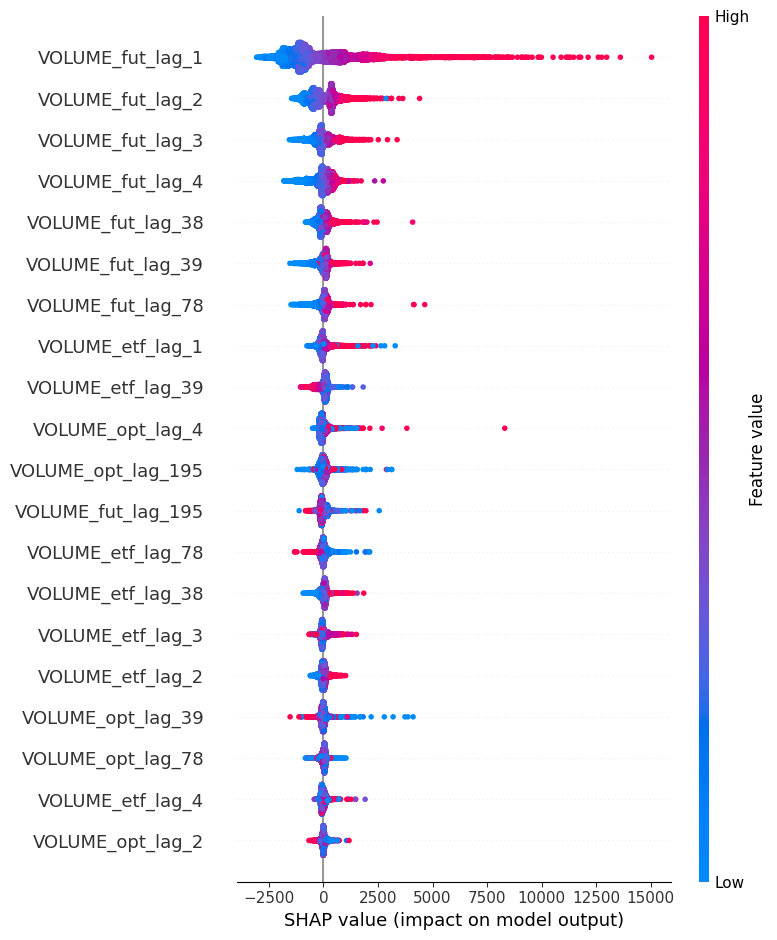

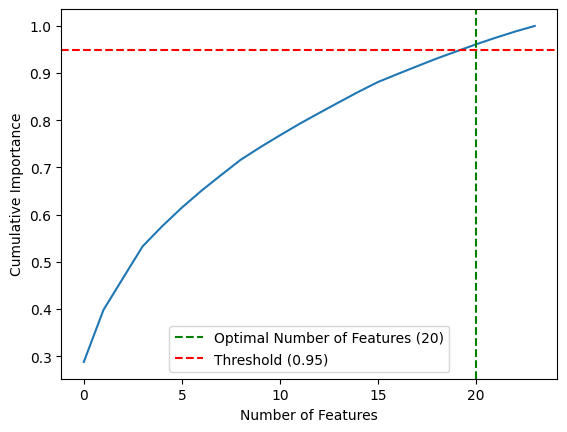

Training xgboost...
Best mean test score: -2095.3146870924047
Training catboost...
Best mean test score: -2084.7287588590443
Training cascadeforest...
Best mean test score: -2116.1858396588377
Training dnn...


2023-12-24 22:08:48.112636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-24 22:08:48.112663: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-24 22:08:48.112682: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dev-host-1.eng.sol.onetick.com): /proc/driver/nvidia/version does not exist
2023-12-24 22:08:48.112953: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best mean test score: -2093.9948275404163


In [4]:
%run preparation_and_training.ipynb

In [5]:
cv_metrics_ia = cv_metrics
cv_metrics_ia.loc[cv_metrics_ia.groupby('model')['mean_test_MAE'].idxmax()]

,params,mean_test_MAE,std_test_MAE,mean_test_R2,std_test_R2,model
11,"{'max_depth': 4, 'n_jobs': 4, 'n_trees': 500, 'random_state': 42, 'use_predictor': True, 'verbose': 0}",-2116.185840,270.968514,0.499910,0.080335,cascadeforest
4,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_seed': 42, 'verbose': 0}",-2084.728759,248.005066,0.512825,0.078958,catboost
15,"{'activation_layer1': 'relu', 'activation_layer2': 'relu', 'batch_size': 32, 'dropout_layer1': 0, 'dropout_layer2': 0, 'epochs': 100, 'hid_layers_num': 2, 'neurons_num_layer1': 32, 'neurons_num_layer2': 32, 'random_seed': 42, 'verbose': 0}",-2093.994828,255.019984,0.510967,0.081861,dnn
0,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'n_jobs': 4, 'random_state': 42, 'verbosity': 0}",-2095.314687,256.317563,0.509016,0.078620,xgboost


In [6]:
metrics_ia = metrics
metrics_ia

{'baseline': {'R2': 0.6916495403944667,
  'MAE': 2570.732538071066,
  'MAPE': 0.21190262146108615},
 'xgboost': {'R2': 0.7621187681177538,
  'MAE': 2217.7651410592653,
  'MAPE': 0.18798066651512296},
 'catboost': {'R2': 0.7655673914457107,
  'MAE': 2212.7026699845546,
  'MAPE': 0.1868531159603609},
 'cascadeforest': {'R2': 0.7626580672400836,
  'MAE': 2208.1082635211487,
  'MAPE': 0.18431201801035121},
 'dnn': {'R2': 0.768390451864041,
  'MAE': 2222.212011000449,
  'MAPE': 0.18769570140853256}}

# Consider intraday seasonality by adding a time feature

In [7]:
REMOVE_SEASONALITY = False
PLOT_CHARTS = True

Feature Importance: model is not specified, using CatBoostRegressor


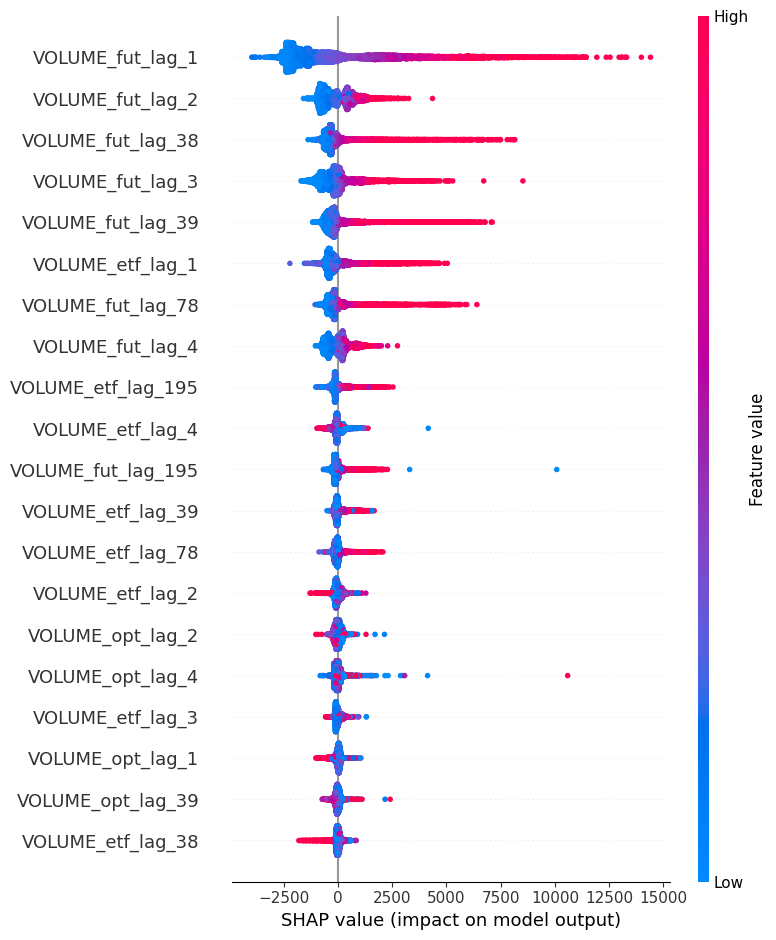

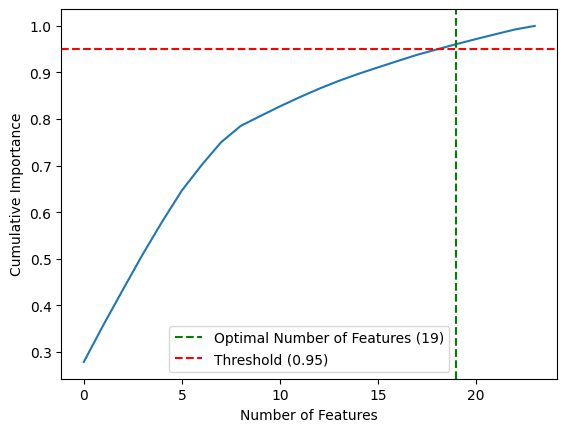

Training xgboost...
Best mean test score: -2102.8821268684683
Training catboost...
Best mean test score: -2090.109464255917
Training cascadeforest...
Best mean test score: -2309.2729620348155
Training dnn...
Best mean test score: -2430.685082505845


In [8]:
%run preparation_and_training.ipynb

In [9]:
cv_metrics_hhmm = cv_metrics
cv_metrics_hhmm.loc[cv_metrics_hhmm.groupby('model')['mean_test_MAE'].idxmax()]

,params,mean_test_MAE,std_test_MAE,mean_test_R2,std_test_R2,model
10,"{'max_depth': 4, 'n_jobs': 4, 'n_trees': 100, 'random_state': 42, 'use_predictor': True, 'verbose': 0}",-2309.272962,383.601330,0.775431,0.046527,cascadeforest
7,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'random_seed': 42, 'verbose': 0}",-2090.109464,272.160021,0.808253,0.033676,catboost
14,"{'activation_layer1': 'relu', 'activation_layer2': 'relu', 'batch_size': 32, 'dropout_layer1': 0, 'dropout_layer2': 0, 'epochs': 100, 'hid_layers_num': 2, 'neurons_num_layer1': 32, 'neurons_num_layer2': 28, 'random_seed': 42, 'verbose': 0}",-2430.685083,418.152321,0.754920,0.041294,dnn
2,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'n_jobs': 4, 'random_state': 42, 'verbosity': 0}",-2102.882127,267.379287,0.805832,0.029785,xgboost


In [10]:
metrics_hhmm = metrics
metrics_hhmm

{'baseline': {'R2': 0.632815109907548,
  'MAE': 2708.410152284264,
  'MAPE': 0.2167638107543498},
 'xgboost': {'R2': 0.7851876029368107,
  'MAE': 2095.0850040648793,
  'MAPE': 0.17679711845692309},
 'catboost': {'R2': 0.7857707038967967,
  'MAE': 2116.219066861335,
  'MAPE': 0.17827825552277074},
 'cascadeforest': {'R2': 0.7338793166559945,
  'MAE': 2391.534789442846,
  'MAPE': 0.20645774124048885},
 'dnn': {'R2': 0.7069143818391928,
  'MAE': 2479.0398913388326,
  'MAPE': 0.21013580915905083}}